# Problem set 2: Descriptive economics - comments/solutions

### Programming for Economists Autumn 2025: Classes 5 & 9
**Matias BF Hall**

**Table of contents**<a id='toc0_'></a>    
- 1. [Basic pandas](#toc1_)    
  - 1.1. [Dataframe](#toc1_1_)    
  - 1.2. [New variable](#toc1_2_)    
  - 1.3. [Indexing](#toc1_3_)    
  - 1.4. [Changing variables](#toc1_4_)    
  - 1.5. [Dropping observations and columns](#toc1_5_)    
  - 1.6. [Renaming](#toc1_6_)    
  - 1.7. [Income distribution](#toc1_7_)    
- 2. [National account identity](#toc2_)    
  - 2.1. [Download](#toc2_1_)    
  - 2.2. [Merge](#toc2_2_)    
  - 2.3. [Split-apply-combine-plot](#toc2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [6]:
import numpy as np

import requests
import pandas as pd
from IPython.display import display
from io import StringIO

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

from dstapi import DstApi

## 1. <a id='toc1_'></a>[Basic pandas](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Dataframe](#toc0_)

Modify the code below such that *income* and *consumption* are variables in the *df* DataFrame.

In [7]:
# Set random seed for replicability
np.random.seed(1999)

# Set number of observations, N
N = 100

# Create data, first an empty dictionary
mydata = {}
# Fill the dictionary with an id from 0 to N-1(0-99)
mydata['id'] = range(N)

# Define income as a log-normally distributed variable with N observations
# and consumption as a concave function of income
income = np.exp(np.random.normal(size=N))
consumption = np.sqrt(income)

# Add income and consumption to the dictionary
mydata['income'] = income
mydata['consumption'] = consumption

# Create a dataframe from the dictionary - we name it df
df = pd.DataFrame(mydata)

# Alternatively, create the dataframe first and then add income and consumption
#df['income'] = income
#df['consumption'] = consumption

# Print the first five rows of the dataframe
df.head()

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712


In [8]:
# Display the whole(truncated) dataframe
display(df)

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712
...,...,...,...
95,95,0.201856,0.449284
96,96,2.368034,1.538842
97,97,2.389874,1.545922
98,98,1.488635,1.220096


### 1.2. <a id='toc1_2_'></a>[New variable](#toc0_)

Create a new variable *ratio* which is the ratio of consumption to income.

In [9]:
# we can add it directly to the dataframe, using the dataframe columns
df['ratio'] = df['consumption']/df['income']
# or define ratio first and then add it to the dataframe
# ratio = consumption/income
# df['ratio'] = ratio
df.head()

,id,income,consumption,ratio
0,0,0.727981,0.853218,1.172033
1,1,1.997831,1.413447,0.707490
2,2,0.276823,0.526140,1.900636
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513


### 1.3. <a id='toc1_3_'></a>[Indexing](#toc0_)

#### **Note that the exact same operation in terms of indexing in Pandas can be done in many ways**
See the examples below here. To my knowledge direct assess can not be used for everything, especially not when the selction of the data source becomes more complicated. So I suppose it would be a good habit to use loc from the getgo, even though it might seem redundant, for the current level of complexity.

**Question a:** Select everybody: with an income above 1.

In [10]:
# we can filter the dataframe directly using boolean indexing
df[df['income'] > 1].head()

# we can do the same using the loc method
# df.loc[df['income'] > 1].head()

# we can even access the columns through the dataframe attribute
#df[df.income > 1].head()

# As stated above, loc is the most "right" way to do it, but I think for this course 
# it is ok to use the one you find the most intuitive

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
6,6,2.574032,1.604379,0.623294
7,7,2.475478,1.573365,0.635580


**Question b:** Select everybody with an income *above* 1 and a ratio *above* 0.7.

In [11]:
# We can also combine several conditions using & (and) and | (or)
# Remember to put each condition in parentheses
I = (df['income'] > 1) & (df['ratio'] > 0.7)
df.loc[I].head()

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
11,11,2.031708,1.425380,0.701567
18,18,1.280235,1.131475,0.883802


### 1.4. <a id='toc1_4_'></a>[Changing variables](#toc0_)

**Question a:** Set consumption equal to 0.5 if income is less than 0.5.

In [12]:
# Index for those with income below 0.5
I = df['income'] < 0.5

# Create a new dataframe where those with income below 0.5 have consumption set to 0.5
df_forced = df.copy()
df_forced.loc[I, 'consumption'] = 0.5
# You can read the indexing as: for those rows where I is true, set the consumption column to 0.5

# Compare
print(f'Original consumption mean: {df['consumption'].mean()}') # <- compare with answer
print(f'Consumption mean with forced consumption: {df_forced['consumption'].mean()}')

# Overall forcing poor consumers to consume less than they would want(sqrt of income), decreases average consumption
# Even though we force some consumers to consume more than they would want, the net effect is a decrease in average consumption

Original consumption mean: 1.0878444061731818
Consumption mean with forced consumption: 1.075479712048503


**Question b:** Set consumption equal to income if income is less than 0.5.

In [13]:
# Index for those with income below 0.5
I = df['income'] < 0.5

# Create a new dataframe where those with income below 0.5 have consumption set to income(hand to mouth consumers)
df_htm = df.copy()
df_htm.loc[I, 'consumption'] = df_htm.loc[I, 'income']

# Compare
print(f'Original consumption mean: {df['consumption'].mean()}') # <- compare with answer
print(f'Consumption mean with hand to mouth: {df_htm['consumption'].mean()}')
# Overall making poor consumers hand to mouth, decreases average consumption as they were all borrowers before

Original consumption mean: 1.0878444061731818
Consumption mean with hand to mouth: 1.0337728690050054


### 1.5. <a id='toc1_5_'></a>[Dropping observations and columns](#toc0_)

Drop the *ratio* variable and all rows with an income above 1.5. After this, also drop the first 5 rows.

In [14]:
# Keep in mind we cannot drop e.g. the coloumn 'ratio' more than once, so make sure to run from the start if you want to try again
print(f'before: {df.shape[0]} observations, {df.shape[1]} variables')
# Since we cannot drop rows directly, we need to reassign the dataframe to itself after dropping rows/columns
df = df.drop('ratio', axis=1) # axis=1 means we drop a column, axis=0 would mean we drop a row
df = df.drop(df[df['income'] > 1.5].index) # drop all rows where income is above 1.5, using the index attribute that gives the row indices
df = df.drop(df[:5].index) # drop the first five rows, again using the index attribute
# alternatively we can index directly using iloc
#df = df.iloc[5:] # drop the first five rows using iloc where we can index directly by position
print(f'after: {df.shape[0]} observations, {df.shape[1]} variables')

before: 100 observations, 4 variables
after: 65 observations, 3 variables


In [15]:
# We can reset the index after dropping rows, so that the index runs from 0 to n-1 again
# This is not strictly necessary, but can be useful
df = df.reset_index(drop=True) # reset the index, drop=True means we do not keep the old index as a column
df.head() #check before and after by running df.head() before and after the reset

,id,income,consumption
0,8,0.582074,0.762938
1,10,0.932044,0.965424
2,12,0.356952,0.597454
3,13,0.379825,0.616299
4,16,0.700896,0.837195


### 1.6. <a id='toc1_6_'></a>[Renaming](#toc0_)

Rename *consumption* to *cons* and *income* to *inc*.

In [16]:
# Run the code from the start to get the right results below, and uncomment your 
# preferred renaming method or to check that they all give the same result

# We can rename columns in several ways

# We can rename all columns at once
print(df.columns) # print current column names to make sure we change the right ones
df.columns = ['id', 'inc', 'cons']  # Rename all columns at once

# We can rename a single column using a list comprehension
#df.columns = [col if col != 'income' else 'inc' for col in df.columns]
# The above reads: for each column in the current columns, if the column is not 'income', keep it the same, otherwise change it to 'inc'

# Alternatively, we can use the rename method
# df = df.rename(columns={'income': 'inc', 'consumption': 'cons'})
# The above reads: rename the column 'income' to 'inc' and 'consumption' to 'cons'

# The most simple way to rename a single column is to just assign to it directly and then drop the old column
#df['inc'] = df['income']
#df = df.drop('income', axis=1)
#df['cons'] = df['consumption']
#df = df.drop('consumption', axis=1)
# This is not very efficient if you have many columns to rename, but it works

df.head()

Index(['id', 'income', 'consumption'], dtype='object')


,id,inc,cons
0,8,0.582074,0.762938
1,10,0.932044,0.965424
2,12,0.356952,0.597454
3,13,0.379825,0.616299
4,16,0.700896,0.837195


In [17]:
# Create the true dataframe again to have the original data for the next exercises
# Set seed again to get the same data
np.random.seed(1999)
N = 100
mydata = {}
mydata['id'] = range(N)
mydata['income'] = np.exp(np.random.normal(size=N))
mydata['consumption'] = np.sqrt(mydata['income'])

df_true = pd.DataFrame(mydata)

df_true = df_true.rename(columns={'income':'inc','consumption':'con'})
df_true.head()

,id,inc,con
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712


### 1.7. <a id='toc1_7_'></a>[Income distribution](#toc0_)

Compute the share of income for each decile of the income distribution using the code below as a starting point.

In [42]:
# Create the deciles - Jeppe does this using list comprehension but I just do it manually
deciles = df_true.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
# the quantile method returns the value at each requested quantile for each column(unless another axis is specified)

# We can use the above computed deciles as bins in the cut function. We add -inf and inf to make sure all values are included
df_true['deciles'] = pd.cut(df_true['inc'], bins=[-np.inf] + list(deciles['inc']) + [np.inf], labels=range(1,11))

# Alternatively we can use the qcut function that does the same in one step
# This seperates into quantiles directly, 10 is for deciles
df_true['decile'] = pd.qcut(df_true['inc'], 10, labels=range(1,11))

# Using the group by method we can now compute the income shares by decile
# You can read it as: take the sum of income for each decile, then divide by the total income
income_shares = df_true.groupby('deciles')['inc'].sum() / df_true['inc'].sum()

# Check that the cut and qcut solutions are the same
#income_shares_extra = df_true.groupby('decile')['inc'].sum() / df_true['inc'].sum()
#np.isclose(income_shares,income_shares_extra)

display(income_shares)
# display is a bit better than print for dataframes and series

C:\Users\admin\AppData\Local\Temp\ipykernel_13036\2859160573.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_shares = df_true.groupby('deciles')['inc'].sum() / df_true['inc'].sum()


deciles
1     0.014112
2     0.027632
3     0.037195
4     0.049923
5     0.064946
6     0.079174
7     0.099996
8     0.126800
9     0.178850
10    0.321371
Name: inc, dtype: float64

#### Bonus

Try to plot the distribution of income using matplotlib and the histogram method. Unhide to see solution

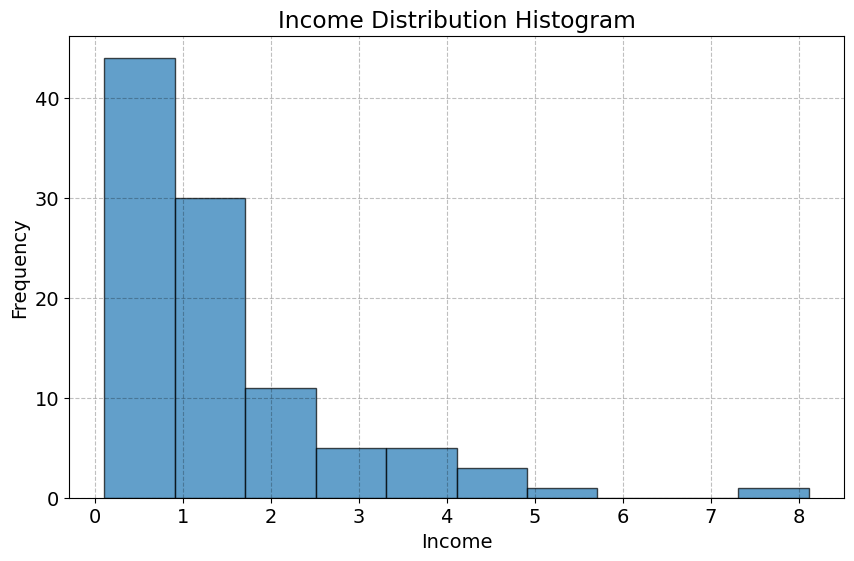

In [37]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(df_true['inc'], bins=10, edgecolor='black', alpha=0.7)
ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.set_title('Income Distribution Histogram')
plt.show();

## 2. <a id='toc2_'></a>[National account identity](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Download](#toc0_)

Consider the following dictionary definitions:

In [19]:
# Here Jeppe has created dictionaries to map the variable names from the API to more standard names
# and to map the variable and unit names to shorter versions
# You can use these dictionaries in the rename method to rename the columns and to map the variable

columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2020-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [20]:
# Use the DST API to make an API for the nah1 dataset
nah1_api = DstApi('nah1') 
# Use the api to get a dictionary of parameter names in english
params = nah1_api._define_base_params(language='en')
# When looking at the parameters we see e.g. that the table name is 'nah1'
display(params)
# Use the api to get the data with the parameters just defined
nah1 = nah1_api.get_data(params=params)

{'table': 'nah1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [21]:
# renaming the columns using the columns_dict
nah1 = nah1.rename(columns=columns_dict)

# renaming the variables using the var_dict and unit_dict
# Looping through the key and value in the dictionaries, we replace the every row
# named the same as the key with the value
for key,value in var_dict.items():
   nah1.variable = nah1.variable.replace(key,value)

for key,value in unit_dict.items():
   nah1.unit = nah1.unit.replace(key,value)

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [22]:
# Keep only the variables in var_dict
# We use the or operator | to keep the true values from previous iterations
I = False
for key,value in var_dict.items():
    I = I | (nah1.variable == value)
nah1 = nah1.loc[I]

# Convert the value column to float
nah1.value = nah1.value.astype('float')

**Step 4:** Discuss what the following summary statistics show.

In [23]:
nah1.groupby(['variable','unit']).describe()
# I'll let you interpret the results, but one quick looks shows that there has been growth in all variables

year                                                     \
                 count    mean        std     min     25%     50%     75%   
variable unit                                                               
C        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
G        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
I        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
M        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
X        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
Y        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2024.0  59.0  8.461741e+05  5.652188e+05    62576.0   
         real     2024.0  59.0  1.189017e+06  3.326502e+05   587078.0   
G        nominal  2024.0  59.0  2.863408e+05  1.984273e+05    14768.0   
         real     2024.0  59.0  4.202840e+05  1.197782e+05   189310.0   
I        nominal  2024.0  59.0  2.525195e+05  1.846182e+05    21134.0   
         real     2024.0  59.0  3.208853e+05  1.354669e+05   137948.0   
M        nominal  2024.0  59.0  5.163237e+05  4.683027e+05    24406.0   
         real     2024.0  59.0  5.583922e+05  3.864176e+05   116721.0   
X        nominal  2024.0  59.0  5.802952e+05  5.353158e+05    23110.0   
         real     2024.0  59.0  6.657858e+05  4.411102e+05   129917.0   
Y        nominal  2024.0  59.0  2.007044e+06  1.465046e+06   144582.0   
         real     2024.0  59.0  2.704755e+06  9.933861e+05  1214124.0   

                                                              
                        25%        50%        75%        max  
variable unit                                                 
C        nominal   338655.0   772989.0  1343689.5  1947969.0  
         real      922289.0  1160977.0  1494856.0  1755213.0  
G        nominal   112034.5   249320.0   486655.5   672154.0  
         real      345416.5   401675.0   543117.5   604346.0  
I        nominal    83003.0   213795.0   369267.0   701509.0  
         real      201830.5   294707.0   408268.5   634575.0  
M        nominal   142456.0   331225.0   867015.5  1778459.0  
         real      225218.5   404314.0   891169.0  1424070.0  
X        nominal   144654.0   380037.0   946940.5  2078142.0  
         real      275983.5   529614.0  1042024.0  1697515.0  
Y        nominal   714095.5  1685585.0  3196822.0  5326389.0  
         real     1802968.5  2547923.0  3591186.0  4552586.0

**Step 5:** Sort the dataset by year

In [24]:
nah1 = nah1.sort_values(by='year')
nah1.head()

,variable,unit,year,value
1964,X,real,1966,129917.0
1965,X,nominal,1966,23110.0
1970,M,real,1966,116721.0
1971,M,nominal,1966,24406.0
1945,G,nominal,1966,14768.0


### 2.2. <a id='toc2_2_'></a>[Merge](#toc0_)

Load population data from Denmark Statistics:

In [25]:
BEFOLK1_api = DstApi('BEFOLK1')
params = BEFOLK1_api._define_base_params(language='en')
display(params)

{'table': 'befolk1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KØN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'CIVILSTAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [26]:
for code in ['KØN','CIVILSTAND']:
    print(code)
    display(BEFOLK1_api.variable_levels(code,language='en'))
    print('')

KØN


,id,text
0,TOT,I alt
1,1,Mænd
2,2,Kvinder



CIVILSTAND


,id,text
0,TOT,I alt
1,U,Ugift
2,G,Gift/separeret
3,E,Enke/enkemand
4,F,Fraskilt


In [27]:
params['variables'][0]['values'] = ['TOT'] 
params['variables'][2]['values'] = ['TOT'] 
BEFOLK1 = BEFOLK1_api.get_data(params=params)
display(BEFOLK1.head())

,KØN,ALDER,CIVILSTAND,TID,INDHOLD
0,Total,"Age, total",Total,1999,5313577
1,Total,0 years,Total,1999,66205
2,Total,1 year,Total,1999,67983
3,Total,10 years,Total,1999,61241
4,Total,11 years,Total,1999,58580


In [28]:
BEFOLK1 = BEFOLK1.rename(columns={'TID':'year','INDHOLD':'population'})
BEFOLK1 = BEFOLK1.drop(columns=['KØN','CIVILSTAND'])
pop = BEFOLK1[BEFOLK1.ALDER == 'Age, total'].drop(columns=['ALDER'])
pop.head()

,year,population
0,1999,5313577
101,2018,5781190
202,1972,4975653
303,2008,5475791
404,1973,5007538


**Question a:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [29]:
# Merging the two datasets on year, using a left join to keep all rows from nah1
# and only those from pop that match on year
merged = pd.merge(nah1,pop,how='left',on=['year'])
merged.tail(10)

,variable,unit,year,value,population
698,G,nominal,2024,672154.0,5961249.0
699,G,real,2024,597071.0,5961249.0
700,M,nominal,2024,1778459.0,5961249.0
701,M,real,2024,1424070.0,5961249.0
702,X,nominal,2024,2078142.0,5961249.0
703,X,real,2024,1697515.0,5961249.0
704,C,nominal,2024,1947969.0,5961249.0
705,C,real,2024,1704543.0,5961249.0
706,Y,nominal,2024,5326389.0,5961249.0
707,Y,real,2024,4552586.0,5961249.0


**Question b:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [30]:
# Make the year the index and rename the population column to population_alt
pop_with_index = pop.set_index('year')
pop_with_index = pop_with_index.rename(columns={'population':'population_alt'})

# Make the year the index for the merged DataFrame
merged_with_index = merged.set_index('year')

# Since the two DataFrames have the same index, we can use the join method to merge them
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2024,G,nominal,672154.0,5961249.0,5961249.0
2024,G,real,597071.0,5961249.0,5961249.0
2024,M,nominal,1778459.0,5961249.0,5961249.0
2024,M,real,1424070.0,5961249.0,5961249.0
2024,X,nominal,2078142.0,5961249.0,5961249.0
2024,X,real,1697515.0,5961249.0,5961249.0
2024,C,nominal,1947969.0,5961249.0,5961249.0
2024,C,real,1704543.0,5961249.0,5961249.0
2024,Y,nominal,5326389.0,5961249.0,5961249.0


**Question c:** Plot GDP per capita and GDP per working-age (18-65) using the code below as a starting point.

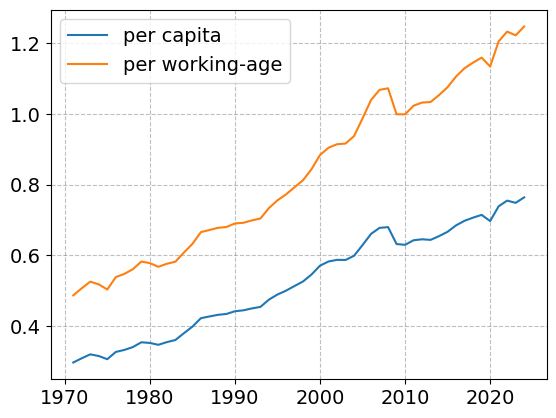

In [31]:
# As BEFOLK1.ALDER is a string variable,
# we use list comprehension to create a list of strings with the age and years
# Try looking at the dataframe Befolk1 to understand the format
ages = [f"{age} years" for age in range(18, 66)]

# Compute the working age population each year
# Read the code as: from BEFOLK1, keep only keep the rows in the list 'ages',
# then group by year and sum the population for each year
working_pop = BEFOLK1[BEFOLK1.ALDER.isin(ages)].groupby('year').sum()

# Clean up the dataframe a bit, see if you can understand what each line does
working_pop = working_pop.drop(columns=['ALDER'])
working_pop = working_pop.rename(columns={'population':'working_population'})

# Merge everything so far together
merged = pd.merge(nah1, working_pop, how='left', on=['year'])
merged = pd.merge(merged, pop, how='left', on=['year'])

# Plot the time series of GDP per capita and GDP per working age capita
# First we need to compute these variables
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Compute the per capita value for all values in the dataframe
merged['value_pop'] = merged.value/merged.population
merged['value_working_pop'] = merged.value/merged.working_population

# Create filter for real GDP only
I = merged.unit == 'real' 
I &= merged.variable == 'Y' 

# Create new dataframe only with real GDP and with year as index for plotting
df = merged[I].set_index('year')

# Plot both series
ax.plot(df.value_pop, label='per capita')
ax.plot(df.value_working_pop, label='per working-age')

ax.legend()


### 2.3. <a id='toc2_3_'></a>[Split-apply-combine-plot](#toc0_)

Ensure the following code for a **split-apply-combine-plot** can run.

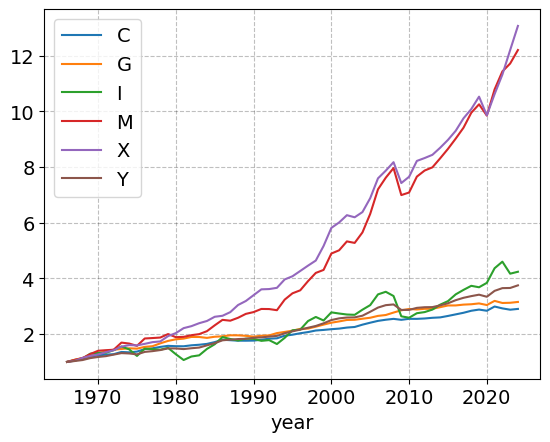

In [32]:
# a. split
nah1_grouped = nah1.groupby(['variable','unit'])
nah1_grouped_first = nah1_grouped.value.first()
nah1_grouped_first.name = 'first'
# We get the first value for each variable and unit combination

# b. apply
nah1_new = nah1.set_index(['variable','unit','year'])
nah1_new = nah1_new.join(nah1_grouped_first,how='left',on=['variable','unit'])
nah1_new = nah1_new.reset_index()
# Join the first value to each row based on variable and unit, then reset the index
# I use a different name so the original stays the same

# c. combine
nah1_new['indexed'] = nah1_new['value']/nah1_new['first']
# Create the indexed variable with the first value as base year

# d. plot
def plot(df,variable='indexed'):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])[variable].plot(legend=True);

plot(nah1_new)

**Question:** Implement the same split-apply-combine as above using `transform`.

In [33]:
def first(x): # select the first element in a series
    return x.iloc[0]

nah1_alt = nah1.copy()
grouped = nah1_alt.groupby(['variable','unit'])
nah1_alt['index_transform'] = grouped['value'].transform(lambda x: x/first(x))
# Using transform we can create the indexed variable directly without needing to join first values
# Using transform and the lambda function we apply the function to each group and 
# return a series with the same index and length as the original
nah1_alt.head()

,variable,unit,year,value,index_transform
1964,X,real,1966,129917.0,1.0
1965,X,nominal,1966,23110.0,1.0
1970,M,real,1966,116721.0,1.0
1971,M,nominal,1966,24406.0,1.0
1945,G,nominal,1966,14768.0,1.0


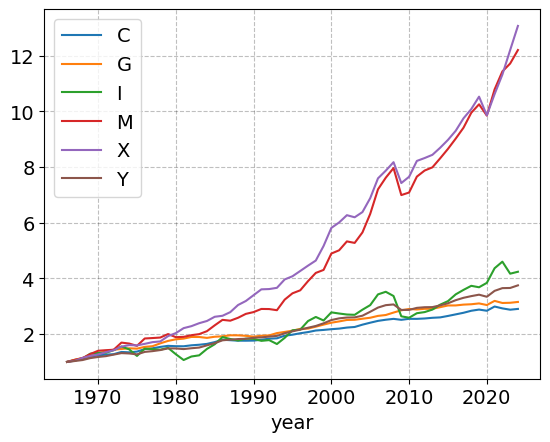

In [34]:
plot(nah1_alt,variable='index_transform')